# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    q = numpy.sin(x)*(x**2)
    return q;

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    g_x = 2*x*(numpy.sin(x)) - (x**2)*(numpy.cos(x)) + (2 * numpy.cos(x)) - 2
    return g_x;

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    definite_integral = g(xmax) - g(xmin)
    return definite_integral;
    # YOUR CODE HERE

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [9]:

def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    #define for loop over N panels
    #within loop define midpoint of each panel
    h = (xmax-xmin)/N
    
    sum = f(xmin) + f(xmax)
    for i in range (1, N):
        x = xmin + i*h
        sum += 2*f(x)
    
        #create a way to sum the new component with the old components
    for i in range (0, N):
        m = xmin + (h/2) + i*h
        sum += 4*f(m)
      
         
        
    return ((h/6)*(sum))
    
    # YOUR CODE HERE

Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Graph showing the log of the error between the analytically and numerically calculated integral of a function as the number of panels, N, is increased ')

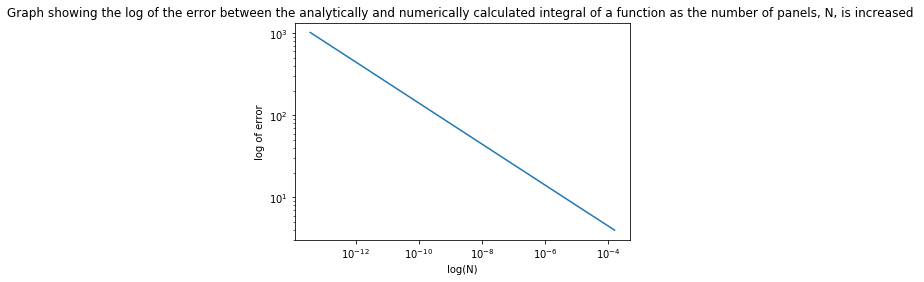

In [12]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024] # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution\

error = []
for i in range (0, len(panel_counts)):
    result_numeric = integrate_numeric(x0, x1, panel_counts[i])
    error_result = (result_analytic - result_numeric)/ result_analytic
    error.append(error_result)
    


plt.loglog(error, panel_counts)
plt.xlabel("log(N)")
plt.ylabel("log of error")
plt.title("Graph showing the log of the error between the analytically and numerically calculated integral of a function as the number of panels, N, is increased ")




What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the numbers of panels increases the accuracy of the numerical method, as the error decreases. However, if the number of panels it taken too large, ie when N becomes extremely large, this can cause the accuracy of the numerical method to fluctuate, so that the error can increase or decrease (and oscillate between these) with increasing N. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Increasing the panel counts increases the accuracy, as it causes the error to decrease. The error of the trapezium method scales with N^(-2), until extremely high values at N at which the error may increase.